# 1)-Import key modules

In [1]:
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# 2) Loading data

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# 3) Checking data

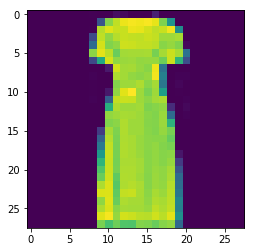

In [5]:
# lets see what the images look like

image = X_train[50, :].reshape((28, 28)) # checking a random row i.e 50 for image

plt.imshow(image)
plt.show()

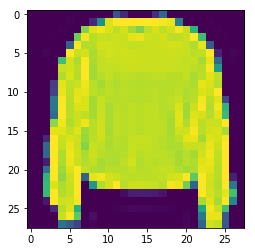

In [6]:
image = X_train[7, :].reshape((28, 28)) 

plt.imshow(image)
plt.show()

In [7]:
print(X_train.shape[0])
print(X_train.shape[1])
print(X_train.shape[2])

60000
28
28


In [8]:
# creating dimensions
img_width = X_train.shape[1]
img_height = X_train.shape[2]

### Labeling 

In [9]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress",
          "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [11]:
print(y_train.shape[0])
print(y_train.shape[1])

60000
10


In [12]:
# taking ten classes as label
num_classes = y_train.shape[1]

In [13]:
num_classes

10

In [14]:
batch_size = 256

# 4)- create model

In [15]:

model = Sequential()
model.add(Flatten(input_shape=(img_width, img_height)))
model.add(Dense(num_classes))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Fit the model
history = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=10, verbose=1,
        validation_data=(X_test, y_test)
    )

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 0s 7us/sample - loss: 9.8732 - acc: 0.2007 - val_loss: 10.4847 - val_acc: 0.1917
Epoch 2/10
60000/60000 [==============================] - 0s 5us/sample - loss: 9.3426 - acc: 0.1946 - val_loss: 9.1931 - val_acc: 0.1646
Epoch 3/10
60000/60000 [==============================] - 0s 6us/sample - loss: 9.1701 - acc: 0.1804 - val_loss: 9.4299 - val_acc: 0.1701
Epoch 4/10
60000/60000 [==============================] - 0s 6us/sample - loss: 9.0601 - acc: 0.1813 - val_loss: 8.4178 - val_acc: 0.1884
Epoch 5/10
60000/60000 [==============================] - 0s 6us/sample - loss: 9.2552 - acc: 0.1790 - val_loss: 9.3687 - val_acc: 0.1893
Epoch 6/10
60000/60000 [==============================] - 0s 6us/sample - loss: 9.2355 - acc: 0.1764 - val_loss: 9.4254 - val_acc: 0.1724
Epoch 7/10
60000/60000 [==============================] - 0s 6us/sample -

# 5)- Evaluating and debugging if needed

In [18]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 9.568655877685547
Test accuracy: 0.155


In [19]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

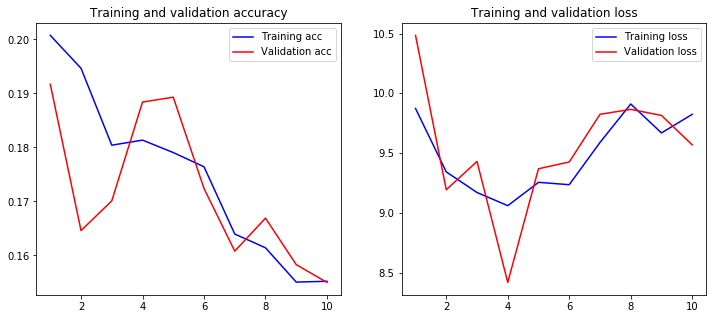

In [20]:
plot_history(history)

# 6)- debugging

activation should be added. It will provide probability between 0 and 1

In [21]:
model = Sequential()
model.add(Flatten(input_shape=(img_width, img_height)))
model.add(Dense(num_classes, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


This 7850 shows that dense layer has 7850 trainable parameters including weights + biases

In [23]:
# Fit the model
history = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=10, verbose=1,
        validation_data=(X_test, y_test)
    )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 0s 7us/sample - loss: 9.3039 - acc: 0.4163 - val_loss: 8.2789 - val_acc: 0.4799
Epoch 2/10
60000/60000 [==============================] - 0s 5us/sample - loss: 8.2254 - acc: 0.4846 - val_loss: 7.9118 - val_acc: 0.5048
Epoch 3/10
60000/60000 [==============================] - 0s 5us/sample - loss: 7.7771 - acc: 0.5135 - val_loss: 7.9094 - val_acc: 0.5050
Epoch 4/10
60000/60000 [==============================] - 0s 5us/sample - loss: 7.6806 - acc: 0.5195 - val_loss: 7.7398 - val_acc: 0.5164
Epoch 5/10
60000/60000 [==============================] - 0s 5us/sample - loss: 7.6017 - acc: 0.5247 - val_loss: 7.7876 - val_acc: 0.5133
Epoch 6/10
60000/60000 [==============================] - 0s 6us/sample - loss: 7.6871 - acc: 0.5195 - val_loss: 8.1965 - val_acc: 0.4884
Epoch 7/10
60000/60000 [==============================] - 1s 9us/sample - loss: 7.6558 - acc: 0.5223 - val_loss: 7.6675 - 

In [24]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 7.56857110824585
Test accuracy: 0.5281


In [25]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

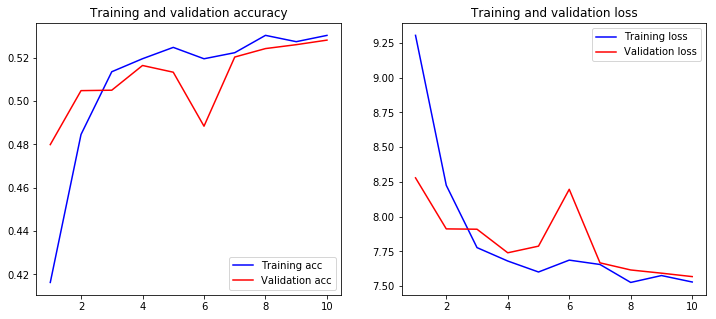

In [26]:
plot_history(history)

There is decrease in loss and increase in accuracy. It is not good enough. We will work in future to improve these results